## Proyecto
### Experimento #01
#### Contador de hojas de grama

**Nombre:** Ernesto Menendez<br/>
**Carnet:** 20072392

In [1]:
from util import read_jpg, plt_show, plt_show2, as_grayscale

import numpy as np
import cv2

#### Imagen original

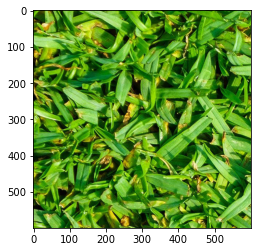

In [2]:
img = read_jpg("grama3")
plt_show(img)

#### Pre-procesamiento de la imagen

##### Aumentar contraste y suavizar la imagen

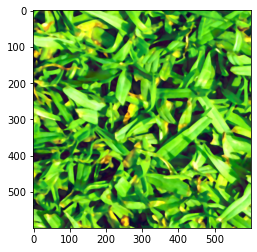

In [3]:
blurred = cv2.medianBlur(img, 5)
blurred = cv2.convertScaleAbs(blurred, alpha=1.5, beta=-50)
blurred = cv2.medianBlur(blurred, 5)
plt_show(blurred)

##### Detección de bordes

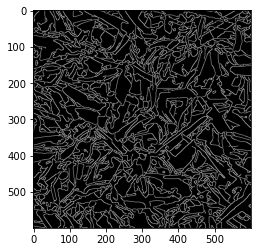

In [4]:
grayscale = as_grayscale(blurred)
edges = cv2.Canny(grayscale, 10, 200, 5, L2gradient=True)
plt_show(edges)


##### Dilatación de bordes

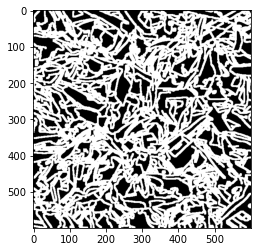

In [5]:
dilation_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
dilated = cv2.dilate(edges, dilation_kernel, iterations=1)
plt_show(dilated)

##### Negativo y erosion de segmentos

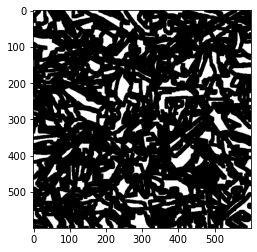

In [6]:
segments = np.logical_not(dilated.astype(np.bool)).astype(np.uint8) * 255
erosion_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
eroded_segments = cv2.erode(segments, erosion_kernel, iterations=1)
plt_show(eroded_segments)

##### Aproximando cantidad de grama contando secciones cerradas

Candidad aprox. de hojas de grama: 441


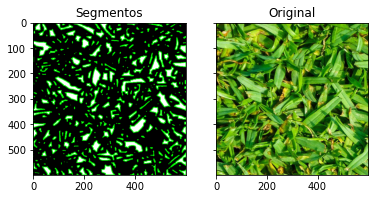

In [8]:
contours, hierarchy = cv2.findContours(eroded_segments, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
bgr_eroded_segments = cv2.cvtColor(eroded_segments, cv2.COLOR_GRAY2BGR)
segments_contours = cv2.drawContours(bgr_eroded_segments, contours, -1, (0, 255, 0), thickness=2)
plt_show2(segments_contours, img, title1="Segmentos", title2="Original")

print(f"Candidad aprox. de hojas de grama: {len(contours)}")